## Let's get started

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts

In [2]:
import os
import cv2

In [3]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.layers.core import Dense, Flatten, Dropout

Using TensorFlow backend.


In [4]:
PATH_TO_VIDEOS = '.\\KTH\\{0}\\'
img_rows, img_cols, num_frames = 16, 16, 25

In [5]:
training_videos = []

### A Function to read all the videos into memory

In [6]:
def append_videos(str_path):
    videos = os.listdir(str_path)
    print('Number of videos for {0}: {1}'.format(str_path, len(videos)))
    
    for video in videos:
        video = str_path + video
        frames = []
        capture = cv2.VideoCapture(video)
        # fps = capture.get(5)
        
        for frameCnt in range(num_frames):
            retVal, frame = capture.read()
            # cv2.imshow(str_path, frame)
            frame = cv2.resize(frame, (img_rows, img_cols), interpolation=cv2.INTER_AREA)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(gray)
            
            # if cv2.waitKey(int(1000/fps)) & 0xFF == ord('q'):
                # break
                
        capture.release()
        # cv2.destroyAllWindows()
        
        frames = np.array(frames)
        frames = np.rollaxis(np.rollaxis(frames, 2, 0), 2, 0)
        
        training_videos.append(frames)
    print('All videos loaded from {0}'.format(str_path))

In [7]:
classes = ['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking']
for _class in classes:
    action_name = PATH_TO_VIDEOS.format(_class)
    append_videos(action_name)

Number of videos for .\KTH\boxing\: 100
All videos loaded from .\KTH\boxing\
Number of videos for .\KTH\handclapping\: 99
All videos loaded from .\KTH\handclapping\
Number of videos for .\KTH\handwaving\: 100
All videos loaded from .\KTH\handwaving\
Number of videos for .\KTH\jogging\: 100
All videos loaded from .\KTH\jogging\
Number of videos for .\KTH\running\: 100
All videos loaded from .\KTH\running\
Number of videos for .\KTH\walking\: 100
All videos loaded from .\KTH\walking\


In [8]:
X_training = np.array(training_videos)
X_training.shape

(599, 16, 16, 25)

In [9]:
num_samples = X_training.shape[0]
labels = np.ones(num_samples, dtype=int)
labels[0:100] = 0 # boxing
labels[100:199] = 1 # handclapping
labels[199:299] = 2 # handwaving
labels[299:399] = 3 # jogging
labels[399:499] = 4 # running
labels[499:599] = 5 # walking
labels.shape

(599,)

## Make data compatible for CNN Input shape

In [10]:
training_set = np.zeros((num_samples, 1, img_rows, img_cols, num_frames))
for h in range(num_samples):
    training_set[h][0][:][:][:] = X_training[h, :, :, :]
print(training_set.shape)

(599, 1, 16, 16, 25)


In [11]:
from keras.utils import np_utils
from keras import backend as K

In [12]:
Y_train = np_utils.to_categorical(labels, len(classes))
Y_train.shape

(599, 6)

In [13]:
training_set_norm = training_set.astype('float32')
training_set_norm = training_set_norm - np.mean(training_set_norm)
training_set_norm = training_set_norm / np.max(training_set_norm)

In [14]:
X_train, X_test, y_train, y_test = tts(training_set_norm, Y_train, test_size=0.33, random_state=4)
print(X_train.shape, X_test.shape)

(401, 1, 16, 16, 25) (198, 1, 16, 16, 25)


In [15]:
K.set_image_dim_ordering('th')

In [21]:
simple_model = Sequential()
simple_model.add(Conv3D(32, (5, 5, 5), input_shape=(1, img_rows, img_cols, num_frames), activation='relu'))
simple_model.add(MaxPooling3D((3, 3, 3)))
simple_model.add(Dropout(0.25))
simple_model.add(Flatten())
simple_model.add(Dense(128, kernel_initializer='normal', activation='relu'))
simple_model.add(Dropout(0.5))
simple_model.add(Dense(len(classes), kernel_initializer='normal', activation='softmax'))
simple_model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [22]:
simple_model_test = simple_model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=2, epochs=20, shuffle=True)

Train on 401 samples, validate on 198 samples
Epoch 1/20
401/401 [==============================] - 25s 63ms/step - loss: 1.5824 - acc: 0.3317 - val_loss: 1.1239 - val_acc: 0.5152
Epoch 2/20
401/401 [==============================] - 26s 66ms/step - loss: 1.3648 - acc: 0.4314 - val_loss: 1.1032 - val_acc: 0.5404
Epoch 3/20
401/401 [==============================] - 27s 68ms/step - loss: 1.2306 - acc: 0.4838 - val_loss: 1.1282 - val_acc: 0.5202
Epoch 4/20
401/401 [==============================] - 29s 72ms/step - loss: 1.1540 - acc: 0.4888 - val_loss: 1.0021 - val_acc: 0.5505
Epoch 5/20
401/401 [==============================] - 30s 75ms/step - loss: 1.0602 - acc: 0.5337 - val_loss: 1.1860 - val_acc: 0.5354
Epoch 6/20
401/401 [==============================] - 33s 83ms/step - loss: 1.0615 - acc: 0.5561 - val_loss: 0.9546 - val_acc: 0.5657
Epoch 7/20
401/401 [==============================] - 36s 89ms/step - loss: 0.9592 - acc: 0.6234 - val_loss: 0.9864 - val_acc: 0.5859
Epoch 8/20
401/4

In [23]:
print(plt.style.available)

['seaborn-paper', 'seaborn-whitegrid', 'fast', 'seaborn-talk', 'seaborn-bright', 'seaborn-ticks', 'seaborn-muted', 'seaborn-poster', 'grayscale', 'seaborn-dark', 'dark_background', 'seaborn-deep', 'seaborn', 'seaborn-notebook', 'seaborn-dark-palette', 'seaborn-pastel', 'bmh', 'Solarize_Light2', 'seaborn-white', 'tableau-colorblind10', 'ggplot', 'fivethirtyeight', 'seaborn-colorblind', 'classic', '_classic_test', 'seaborn-darkgrid']


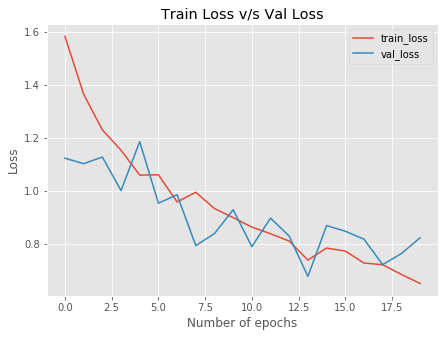

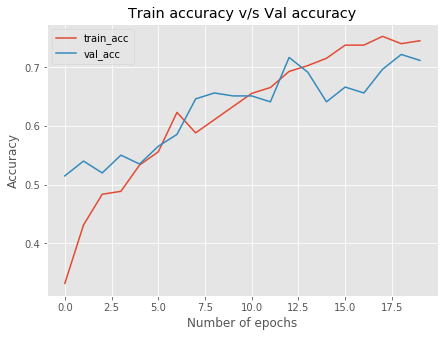

In [24]:
train_loss = simple_model_test.history['loss']
val_loss = simple_model_test.history['val_loss']
train_acc = simple_model_test.history['acc']
val_acc = simple_model_test.history['val_acc']
xcs = range(len(train_loss))

plt.figure(1, figsize=(7, 5))
plt.plot(xcs, train_loss)
plt.plot(xcs, val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Train Loss v/s Val Loss')
plt.grid(True)
plt.style.use(['ggplot'])
plt.legend(['train_loss', 'val_loss'])

plt.figure(2, figsize=(7, 5))
plt.plot(xcs, train_acc)
plt.plot(xcs, val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Train accuracy v/s Val accuracy')
plt.grid(True)
plt.style.use(['ggplot'])
plt.legend(['train_acc', 'val_acc'])

In [25]:
simple_model_test_score = simple_model.evaluate(X_test, y_test)
print(simple_model.metrics_names)
print(simple_model_test_score)

198/198 [==============================] - 3s 16ms/step
['loss', 'acc']
[0.8244572432354244, 0.712121211519145]
